In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import geopandas as gpd
import plotly.express as px

In [2]:
df = pd.read_csv('austin_weather.csv')
df = df[(df.Date < '2017-01-01') & (df.Date > '2015-12-31')]
df = df.drop([
    'TempHighF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF',
    'HumidityHighPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches',
    'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles',
    'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindGustMPH',
    'PrecipitationSumInches', 'Events'
], axis=1)
df.loc[:,'AvgTemperature'] = round((df['TempAvgF'] - 32) / 1.8,1) 
df = df.drop('TempAvgF', axis=1)
df.loc[:, ['HumidityAvgPercent', 'WindAvgMPH']] = df[['HumidityAvgPercent', 'WindAvgMPH']].astype(float)

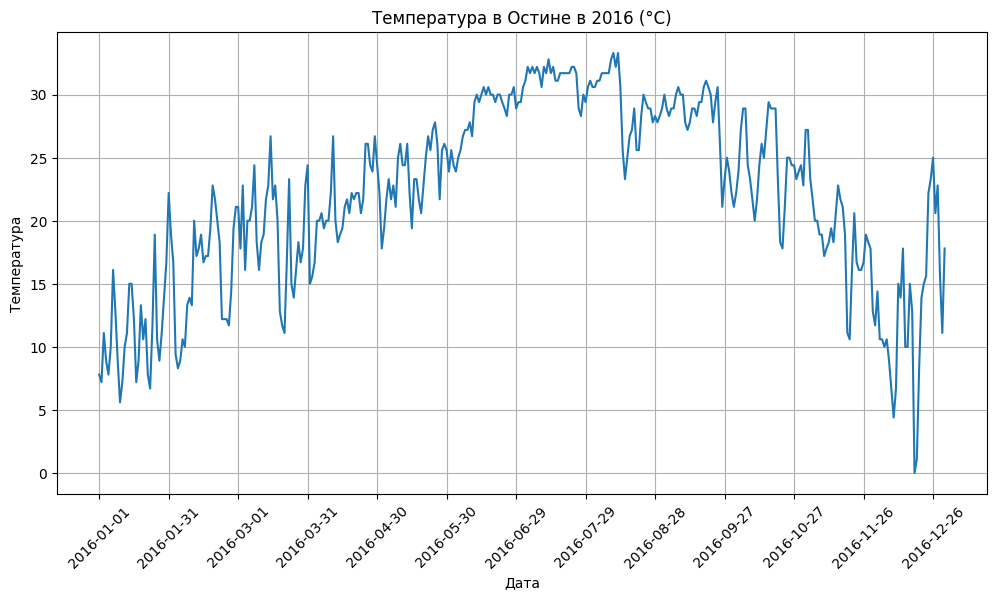

In [4]:
# Задание 1
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['AvgTemperature'])
plt.title('Температура в Остине в 2016 (°C)')
plt.xlabel('Дата') 
plt.xticks(df['Date'][::30], rotation=45)
plt.ylabel('Температура') 
plt.grid()
plt.show()

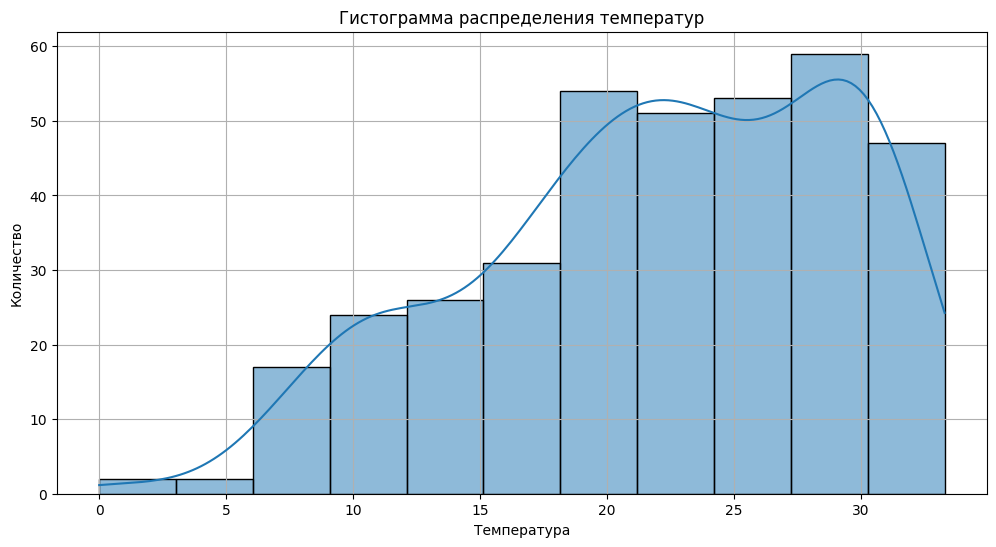

In [5]:
# Задание 2
plt.figure(figsize=(12,6))
sns.histplot(df['AvgTemperature'], kde=True)
plt.title('Гистограмма распределения температур')
plt.xlabel('Температура')
plt.ylabel('Количество')
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


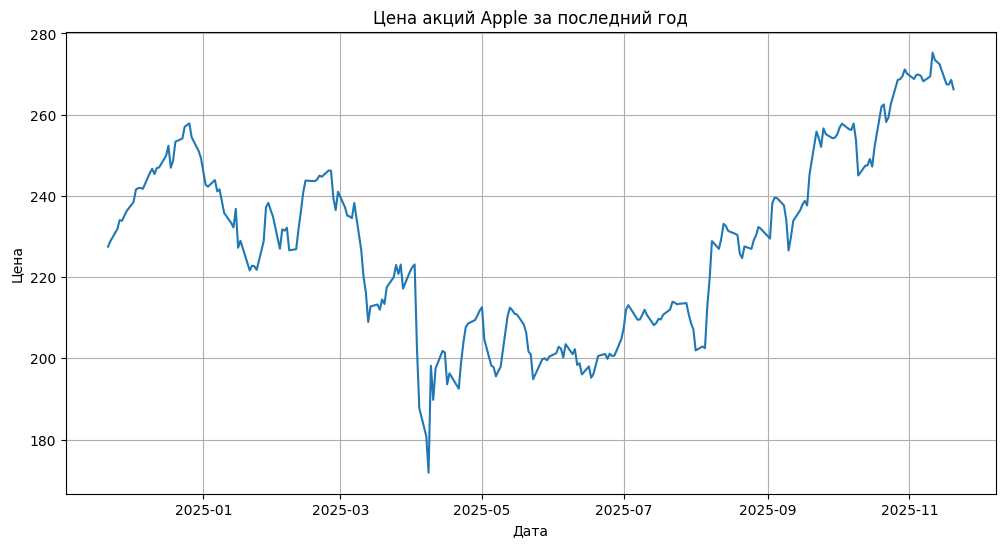

In [6]:
# Задание 3
ticker = "AAPL"

data = yf.download(ticker, period="1y", auto_adjust=True)
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'])
plt.title('Цена акций Apple за последний год')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid()
plt.show()


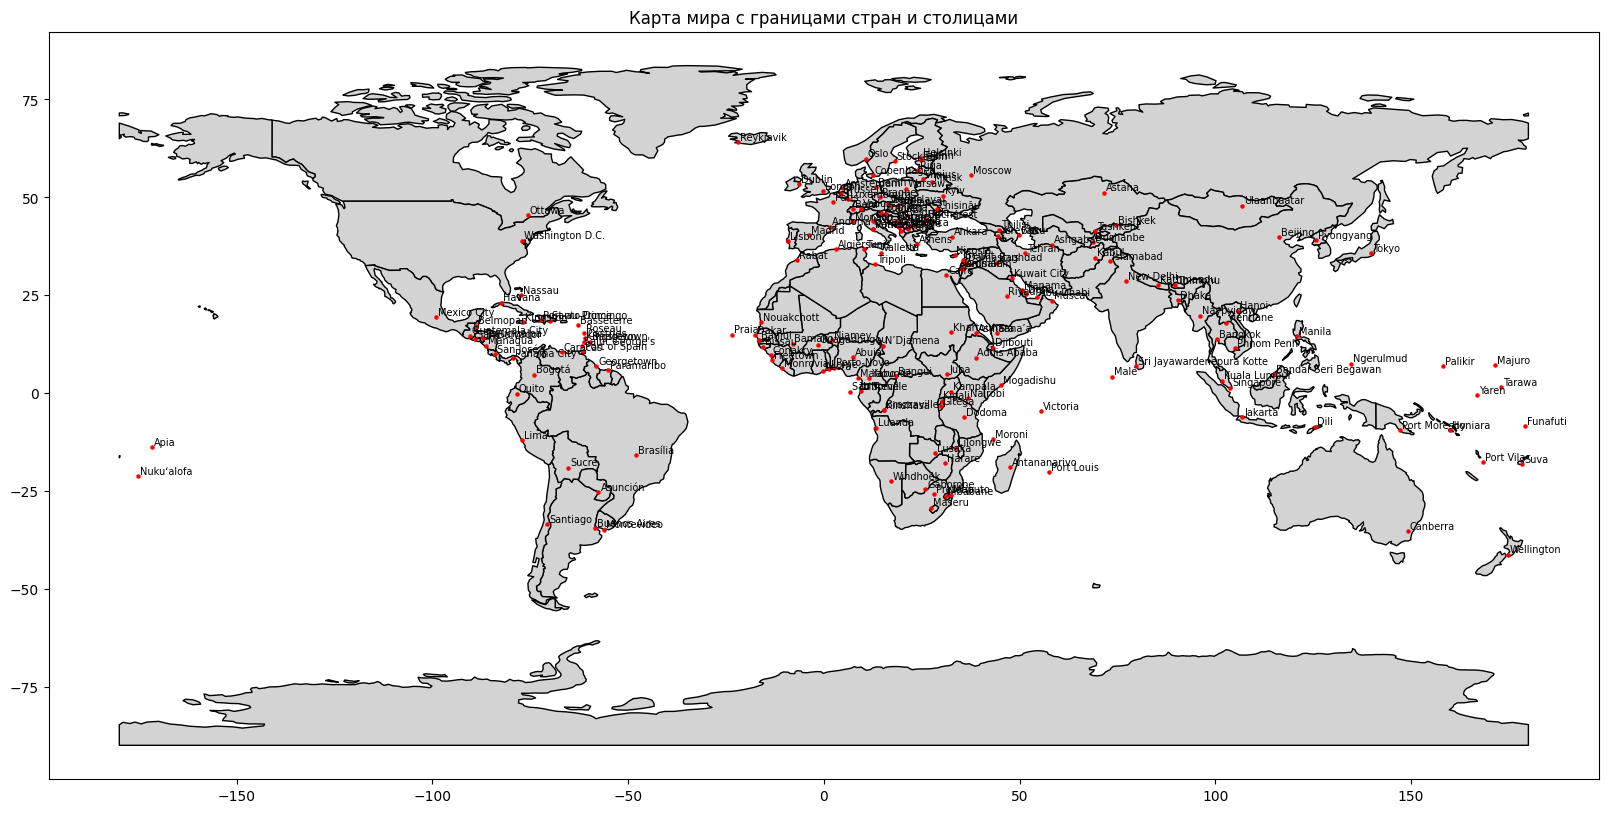

In [7]:
# Задание 4
capitals = pd.read_excel('capitals.xlsx')
world = gpd.read_file(r"C:\Users\Normc\OneDrive\Рабочий стол\Python\Solutions_mag\New folder\ne_110m_admin_0_countries.shp")

capitals_gdf = gpd.GeoDataFrame(capitals, geometry=gpd.points_from_xy(capitals.longitude, capitals.latitude),)

fig, ax = plt.subplots(figsize=(20,15))
world.plot(ax=ax, edgecolor='black', color='lightgray')  
capitals_gdf.plot(ax=ax, color='red', markersize=5) 

for x, y, label in zip(capitals_gdf.geometry.x, capitals_gdf.geometry.y, capitals_gdf['capital']):
    ax.text(x+0.5, y+0.5, label, fontsize=7)

plt.title("Карта мира с границами стран и столицами")
plt.show()


In [8]:
# Задание 5
fig = px.scatter(df, x='Date', y="AvgTemperature", title='Температура в Остине в 2016')
fig.show()

[*********************100%***********************]  1 of 1 completed


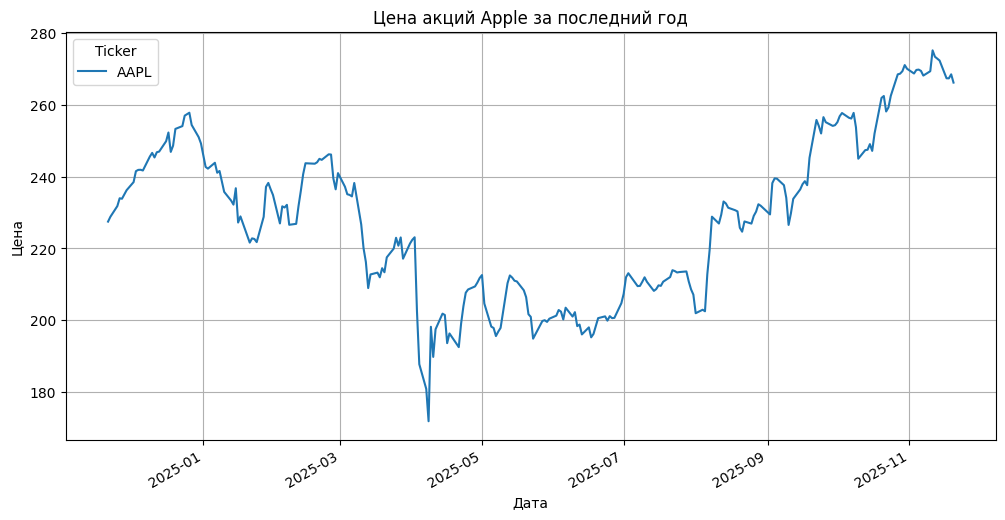

In [9]:
# Задание 6
data = pd.DataFrame(yf.download(ticker, period="1y", auto_adjust=True))
data.Close.plot(figsize=(12,6), title='Цена акций Apple за последний год', xlabel='Дата', ylabel='Цена', grid=True)
plt.show()

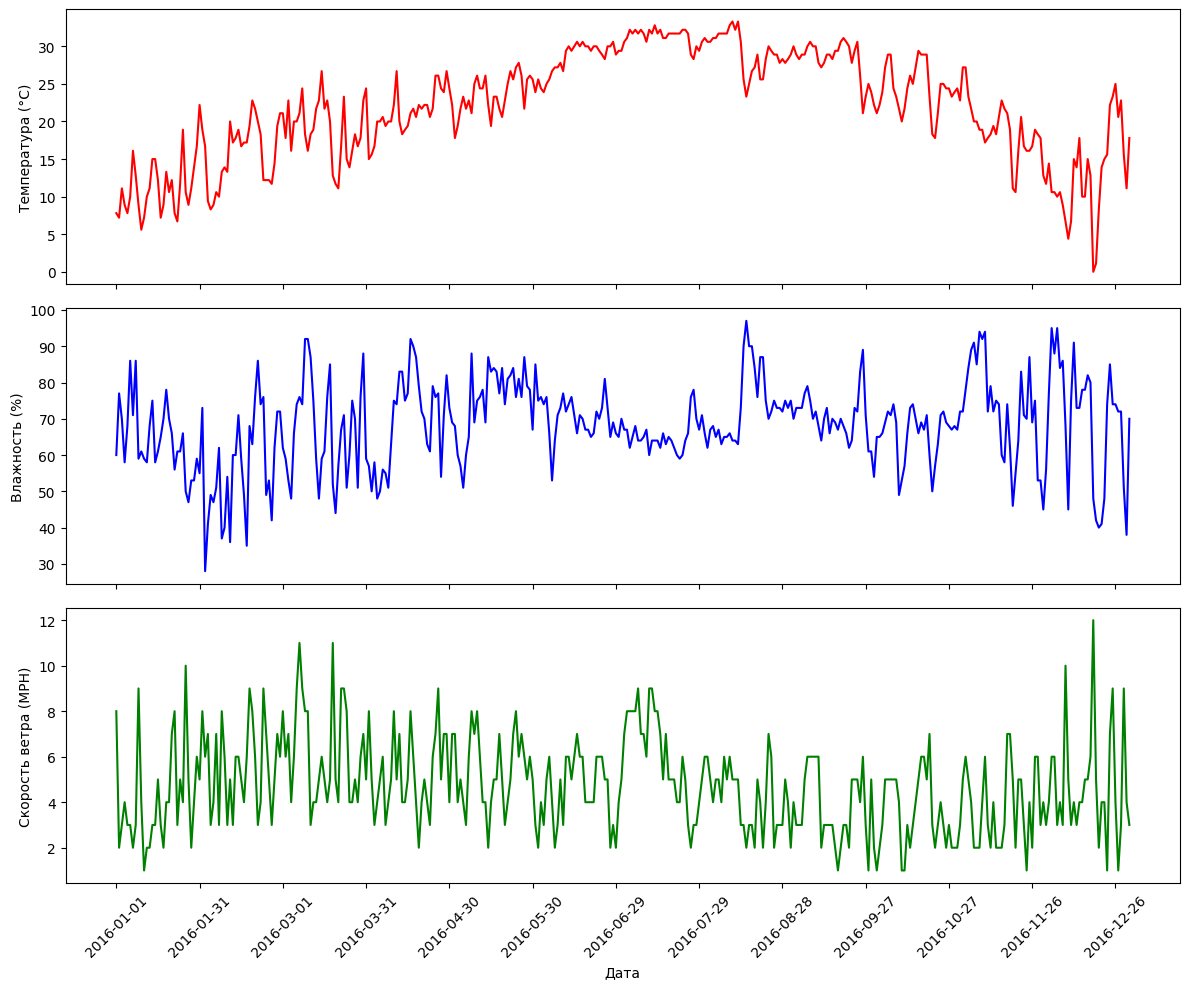

In [10]:
# Задание 7
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

ax[0].plot(df['Date'], df['AvgTemperature'], color='red')
ax[0].set_ylabel('Температура (°C)')

ax[1].plot(df['Date'], df['HumidityAvgPercent'], color='blue')
ax[1].set_ylabel('Влажность (%)')

ax[2].plot(df['Date'], df['WindAvgMPH'], color='green')
ax[2].set_ylabel('Скорость ветра (MPH)')
ax[2].set_xlabel('Дата')

plt.xticks(df['Date'][::30], rotation=45)
plt.tight_layout()
plt.show()

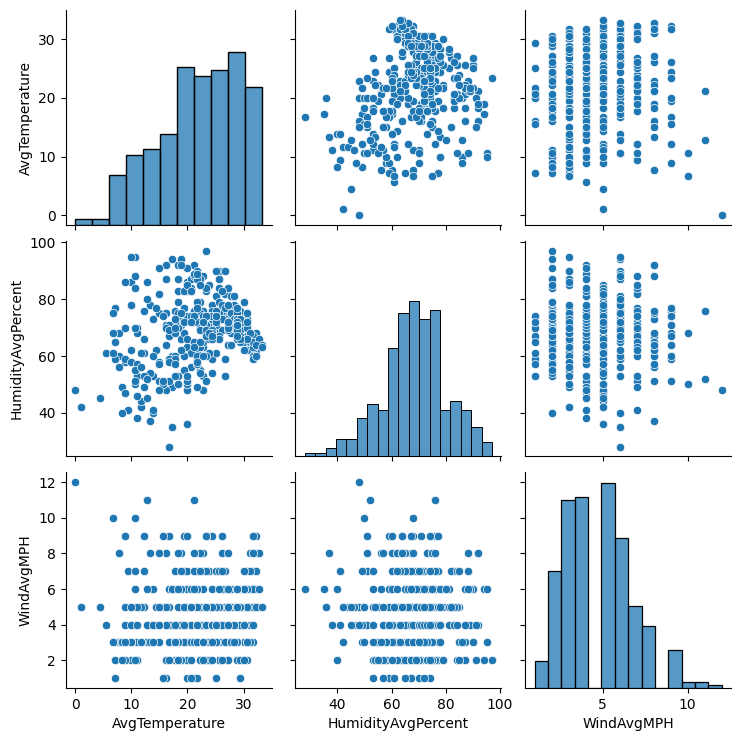

In [11]:
# Задание 8
df_pair = df[['AvgTemperature', 'HumidityAvgPercent', 'WindAvgMPH']]
sns.pairplot(df_pair)
plt.show()